In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
arr = np.load('tsvd.npy')

In [7]:
arr[:5]

array([[-0.23072726,  2.93785782, -0.42450476, -1.12765702],
       [-3.5190057 , -0.99026886,  0.23558811,  0.44651495],
       [ 1.40405965, -1.23507889,  2.38473567, -1.59258498],
       [-1.16115394,  1.47758231,  0.73224284, -1.91015916],
       [ 1.12562981, -0.36483937, -1.82922572, -1.7297884 ]])

In [8]:
df = pd.DataFrame(arr, columns = ['PC1','PC2','PC3','PC4'])

In [10]:
df.head()

,PC1,PC2,PC3,PC4
0,-0.230727,2.937858,-0.424505,-1.127657
1,-3.519006,-0.990269,0.235588,0.446515
2,1.404060,-1.235079,2.384736,-1.592585
3,-1.161154,1.477582,0.732243,-1.910159
4,1.125630,-0.364839,-1.829226,-1.729788


## Mean Shift

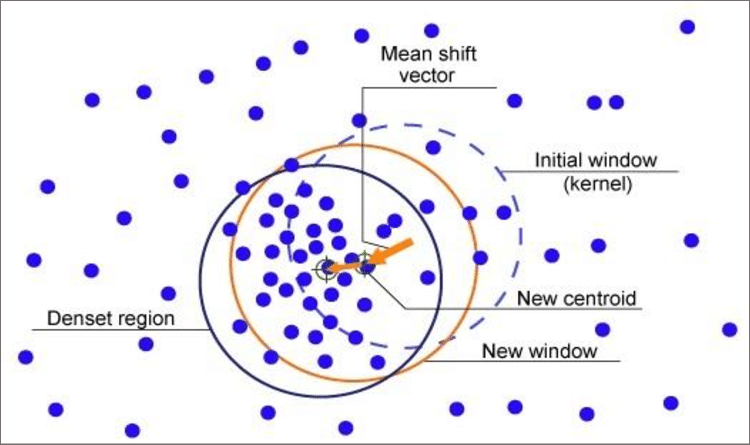

중심을 데이터가 모여있는 밀도가 가장 높은 곳으로 이동

군집 중심점은 데이터 포인트가 모여있는 곳이라는 생각에서 착안, 이를 위해 확률밀도함수를 이용, 확률밀도함수를 찾기 위해 KDE 사용

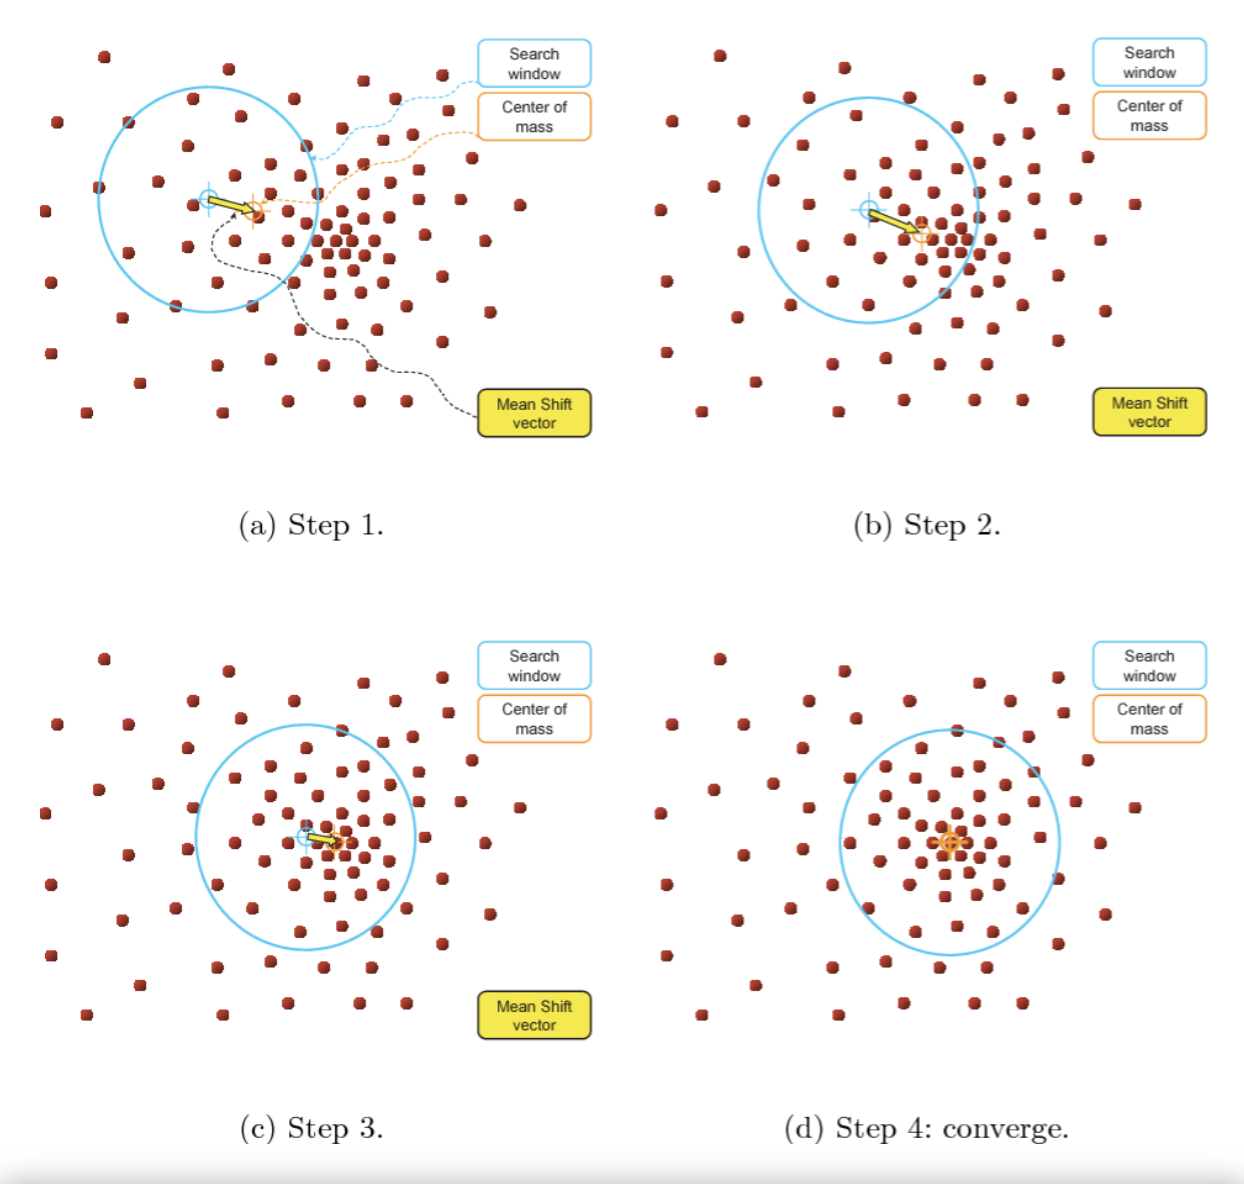

K-Means와 다르게 군집의 갯수를 지정할 필요는 없고, 대역폭의 크기에 따라 군집의 개수를 최적으로 설정

In [25]:
from sklearn.cluster import estimate_bandwidth

In [33]:
bandwidth = estimate_bandwidth(df, quantile = 0.1)

In [34]:
bandwidth

2.3729345618137976

In [11]:
from sklearn.cluster import MeanShift

In [35]:
meanshift = MeanShift(bandwidth=bandwidth)
means_labels = meanshift.fit_predict(df)
print(np.unique(means_labels))

[0 1 2]


In [36]:
df['meanshift_label'] = means_labels

In [37]:
import seaborn as sns

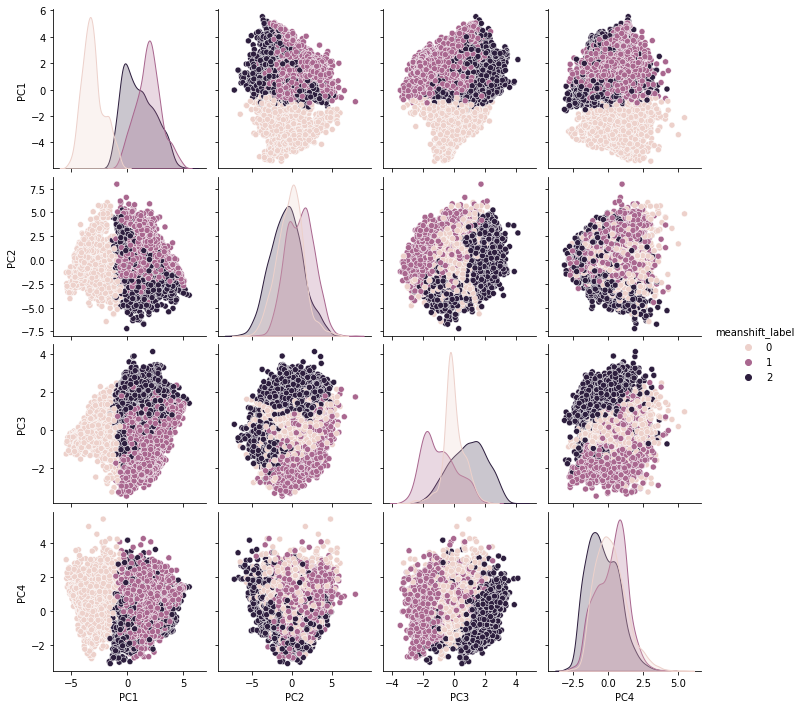

In [41]:
sns.pairplot(df, hue = 'meanshift_label')

In [76]:
from itertools import combinations
comb = combinations(df.columns[:4], 2)

In [77]:
li_com = list(comb)

In [87]:
centers = meanshift.cluster_centers_
unique_labels = np.unique(means_labels)
markers = ['o','s','x']
column = {'PC1':0, 'PC2':1, 'PC3':2, 'PC4':3}

In [98]:
centers

array([[-3.28904133,  0.04414232, -0.07793545, -0.28804512],
       [ 1.91211612,  1.15293636, -1.12090977, -0.14842034],
       [ 0.65804002,  0.1007637 ,  0.81856851, -1.11002521]])

C:\Users\dlarh\anaconda3\envs\adp\lib\site-packages\ipykernel_launcher.py:6: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  
C:\Users\dlarh\anaconda3\envs\adp\lib\site-packages\ipykernel_launcher.py:13: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  del sys.path[0]


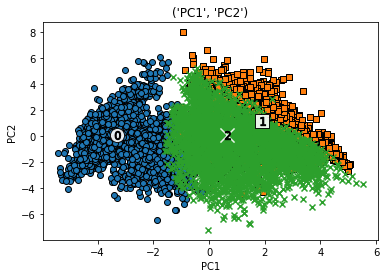

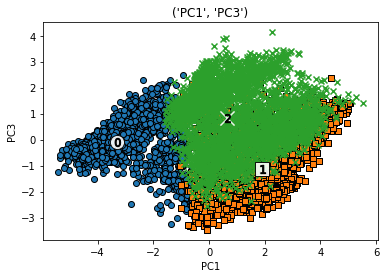

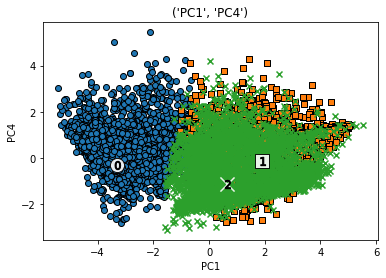

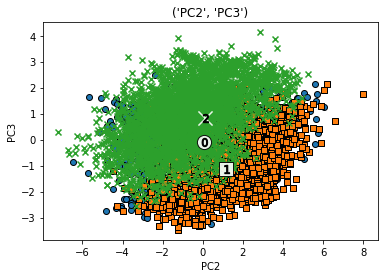

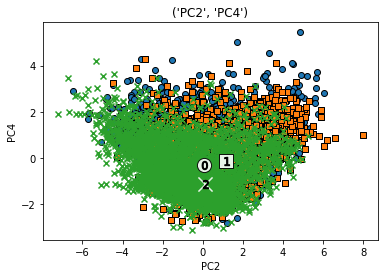

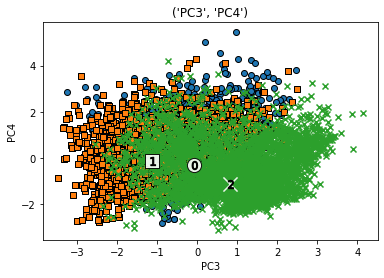

In [104]:
for com in li_com:
    for label in unique_labels:
        label_cluster = df[df['meanshift_label'] == label]
        center_data = centers[label]
        
        plt.scatter(x = label_cluster[com[0]], y = label_cluster[com[1]], edgecolor = 'k', marker = markers[label])
        plt.title(com)
        plt.xlabel(com[0])
        plt.ylabel(com[1])
    for label in unique_labels:
        label_cluster = df[df['meanshift_label'] == label]
        center_data = centers[label]
        plt.scatter(x = center_data[column[com[0]]], y = center_data[column[com[1]]],s = 200,  color = 'white', edgecolor = 'k', alpha = 0.9, marker = markers[label])
        plt.scatter(x = center_data[column[com[0]]], y = center_data[column[com[1]]], s = 70, color = 'k', edgecolor = 'k', marker = '$%d$' % label)
        
    plt.show()


In [105]:
print(df['meanshift_label'].value_counts())

2    3090
1    2794
0    2752
Name: meanshift_label, dtype: int64


## DBSCAN